# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
%matplotlib inline

# Reading the File

In [2]:
df = pd.read_csv("insurance.csv")

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


# Checking Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Checking Null Values

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Checking for Blank Strings

In [6]:
np.where(df == " ")

C:\Users\aditi\AppData\Roaming\Python\Python37\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
C:\Users\aditi\AppData\Roaming\Python\Python37\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


(array([], dtype=int64), array([], dtype=int64))

# Checking Duplicates

In [7]:
df.duplicated().sum()

1

In [8]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [9]:
df[df.charges == 1639.5631]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


# Dropping Duplicates

In [10]:
df = df.drop_duplicates()
df.shape

(1337, 7)

# Checking Value Counts of variables

In [11]:
for col in df.iloc[:, 1:].columns:
    if df[col].dtype == object:
        a = df[col].value_counts()
        print('Feature: ',col,'\n', a,'\n', "*"*120, '\n')

Feature:  sex 
 male      675
female    662
Name: sex, dtype: int64 
 ************************************************************************************************************************ 

Feature:  smoker 
 no     1063
yes     274
Name: smoker, dtype: int64 
 ************************************************************************************************************************ 

Feature:  region 
 southeast    364
southwest    325
northeast    324
northwest    324
Name: region, dtype: int64 
 ************************************************************************************************************************ 



# Checking for Outliers

Feature:  age


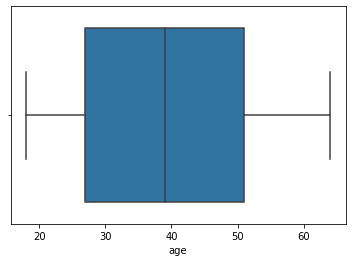

*****************************************************************************************************************************
Feature:  bmi


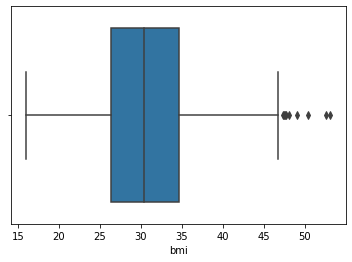

*****************************************************************************************************************************
Feature:  children


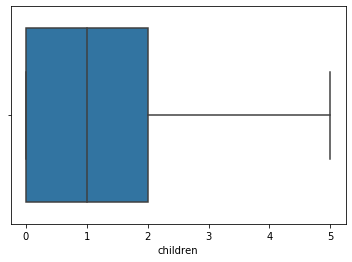

*****************************************************************************************************************************


In [12]:
for col in df.iloc[:, :-1].columns:
    if df[col].dtype != object:
        print('Feature: ',col)
        sns.boxplot(df[col])
        plt.show()
        print( "*"*125)

Outliers in BMI

# Removing Outliers

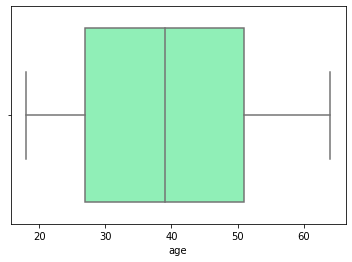

**************************************************************************************************** 




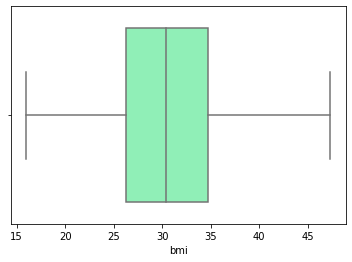

**************************************************************************************************** 




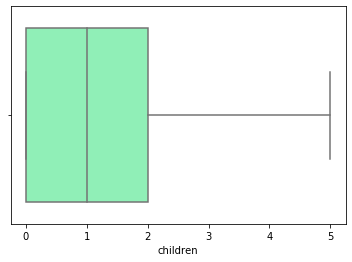

**************************************************************************************************** 




In [13]:
for col in df.iloc[:, :-1].columns:
    if df[col].dtype != object:
        
        q1, q3 = np.percentile(df[col], [25,75])
        
        iqr = q3-q1
        lower_fence = q1 - (1.5 * iqr)
        upper_fence = q3 + (1.5 * iqr)
        
        df[col] = df[col].apply(lambda x: upper_fence if x > upper_fence else lower_fence if x< lower_fence else x)
        sns.boxplot(x = df[col], data= df, palette='rainbow', orient='h')
        plt.show()
        print('*'*100, '\n'*2)

Outliers Removed

# Checking Distribution

Feature:  age


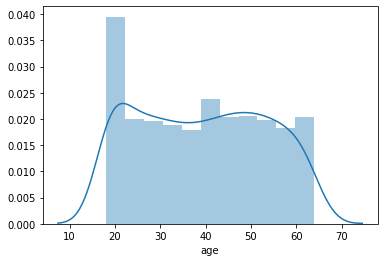

*****************************************************************************************************************************
Feature:  bmi


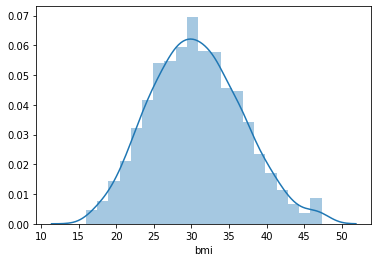

*****************************************************************************************************************************
Feature:  children


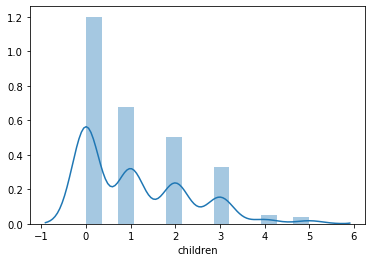

*****************************************************************************************************************************
Feature:  charges


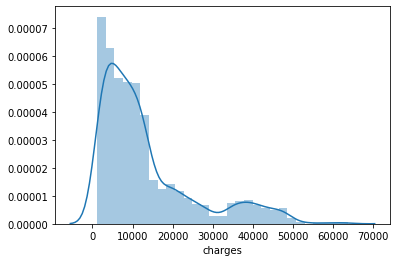

*****************************************************************************************************************************


In [14]:
for col in df.columns:
    if df[col].dtype != object:
        print('Feature: ',col)
        sns.distplot(df[col])
        plt.show()
        print( "*"*125)

Target is skewed

# Count Plot for Children

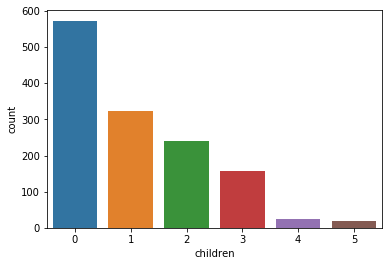

In [15]:
sns.countplot(df.children)

# Count plot for Region

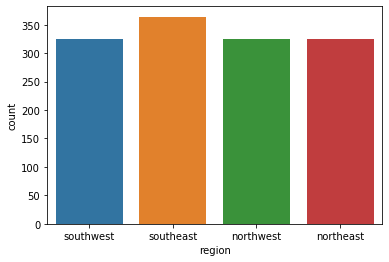

In [16]:
sns.countplot(df.region)

# Pie Chart for Smoker

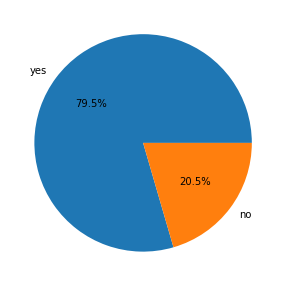

In [17]:
fig = plt.figure(figsize = (5,5))

plt.pie(df.smoker.value_counts(), 
        autopct='%1.1f%%',
        labels=df.smoker.unique());

Imbalanced Class

# Histogram for bmi

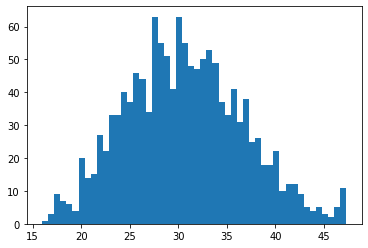

In [18]:
plt.hist(df.bmi, bins = 50);

No skewness- It is a bell curve

# Bivariate Analysis

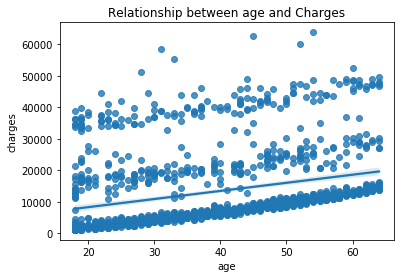

*****************************************************************************************************************************


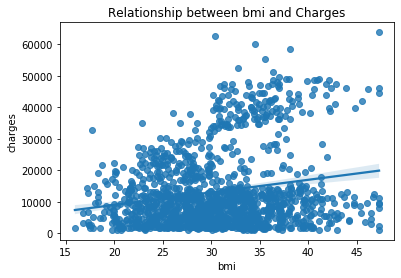

*****************************************************************************************************************************


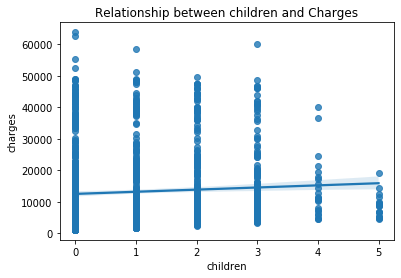

*****************************************************************************************************************************


In [19]:
## Scatterplots for all numerical variables wrt target

for col in df.iloc[:,:-1].columns:
    if df[col].dtype != object:
        sns.regplot(x = df[col],
                   y = 'charges',
                   data = df,
                   fit_reg = True)
        
        plt.title("Relationship between {} and Charges".format(col))
        plt.show()
        print("*"*125)

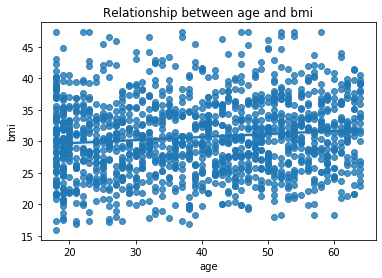

In [20]:
## Age and bmi should be related. Checking if it has an impact

sns.regplot(x = 'age',
                   y = 'bmi',
                   data = df,
                   fit_reg = True)

plt.title("Relationship between age and bmi")
plt.show()

The scatter is huge

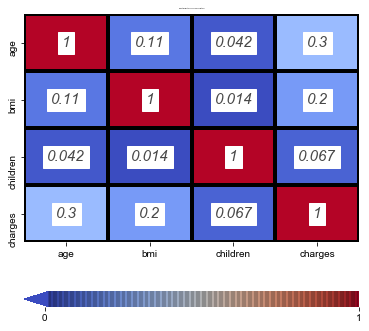

In [21]:
## Correlation Matrix

plt.figure(figsize=(6,6))
annot_kws={'fontsize': 15,'fontstyle':'italic','color':'k', 'alpha': 0.8,
'backgroundcolor':'w', 'verticalalignment':'center', 'rotation':'horizontal'}

cbar_kws={'orientation':'horizontal',
'shrink':1,
'extend':'min',
'extendfrac':0.08,
'ticks':np.arange(0,22),
'drawedges':True}

sns.heatmap(df.corr(), cmap='coolwarm', annot=True, annot_kws=annot_kws, cbar_kws=cbar_kws, linewidth=3, linecolor='k')
plt.title('heatmap to check correlation', fontsize=2)

sns.set(font_scale= 1.4)


Number of children has a high correlation with the charges

# Encoding

In [22]:
# Onehot Encoding

new_df = pd.get_dummies(df, columns =['sex', 'smoker'], drop_first = True)

new_df.head()

,age,bmi,children,region,charges,sex_male,smoker_yes
0,19,27.900,0,southwest,16884.92400,0,1
1,18,33.770,1,southeast,1725.55230,1,0
2,28,33.000,3,southeast,4449.46200,1,0
3,33,22.705,0,northwest,21984.47061,1,0
4,32,28.880,0,northwest,3866.85520,1,0


In [23]:
## Label Encoding

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [24]:
def labelencoder(df,col):
  # define label encoder 
    label_encoder = preprocessing.LabelEncoder()
    df[col]= label_encoder.fit_transform(df[col])

In [25]:
labelencoder(new_df, 'region')

new_df.head()

,age,bmi,children,region,charges,sex_male,smoker_yes
0,19,27.900,0,3,16884.92400,0,1
1,18,33.770,1,2,1725.55230,1,0
2,28,33.000,3,2,4449.46200,1,0
3,33,22.705,0,1,21984.47061,1,0
4,32,28.880,0,1,3866.85520,1,0


In [26]:
new_df.region.value_counts()

2    364
3    325
1    324
0    324
Name: region, dtype: int64

In [27]:
df.region.value_counts()

southeast    364
southwest    325
northeast    324
northwest    324
Name: region, dtype: int64

# Seperate features and target

In [28]:
X = new_df.drop("charges",axis=1)
y = new_df["charges"]


# Data Split

In [29]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.2,random_state=100)

In [30]:
print('X_train: ', len(X_train), '\t', 'y_train', len(y_train))
print('X_test: ', len(X_test), '\t', 'y_test', len(y_test))

X_train:  1069 	 y_train 1069
X_test:  268 	 y_test 268


# Model Building

In [31]:
# import the regressor 

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

In [32]:
regressor.fit(X_train, y_train) #training the algorithm

print(regressor)

LinearRegression()


In [33]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

-12261.472744389317
[  266.56847406   332.27352735   483.37325575  -279.37816867
   -41.14598125 23563.2951643 ]


In [34]:
regressor.score(X_train,y_train)

0.750010998582634

In [35]:
regressor.score(X_test,y_test)

0.7521408157321864

In [36]:
## Predicting on Test Data

y_test_pred = regressor.predict(X_test)
y_test_pred[:15]

array([ 4420.53101264,  4468.57853693,  8373.86360913,  1906.11866445,
       24423.89502281, 37312.90393427,  6656.62627378, 11396.43514402,
       29138.5149728 , 16431.33800299, 15872.23842019, 11390.53590823,
       11522.56510633,  4525.84032753,  9372.86188275])

In [37]:
## Checking Metrices

from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, mean_absolute_error, mean_squared_error, r2_score

print('MAE: ',mean_absolute_error(y_test, y_test_pred))

print('MSE: ', mean_squared_error(y_test, y_test_pred))

print('RMSE: ',np.sqrt(mean_squared_error(y_test, y_test_pred)))

print('R2: ',r2_score(y_test, y_test_pred)*100)

print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))


MAE:  3992.7709567700867
MSE:  33600158.630415946
RMSE:  5796.564381632964
R2:  75.21408157321864
Adjusted R^2: 0.7464429034501676


In [38]:
## Checking Values of Coefficient

coef_df = pd.DataFrame(regressor.coef_,
                      index = X.columns,
                      columns =['Coefficient'])

coef_df

,Coefficient
age,266.568474
bmi,332.273527
children,483.373256
region,-279.378169
sex_male,-41.145981
smoker_yes,23563.295164


Variable "Smoker" has a very high weight/ coefficient

# Visualizing the differences between actual charges and predicted charges

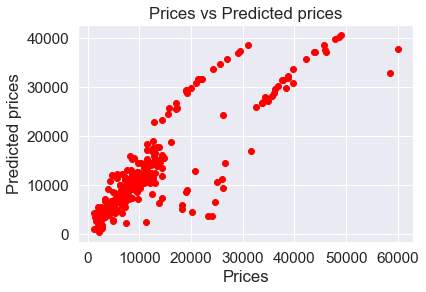

In [39]:
plt.scatter(y_test,
           y_test_pred,
           color = 'red')

plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()


# Checking Residuals- Heteroskedasticity

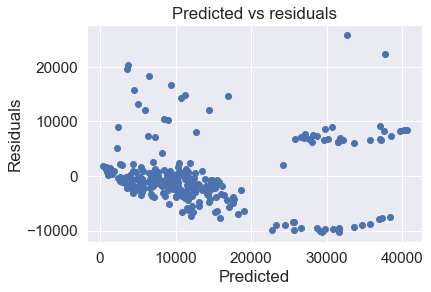

In [40]:
plt.scatter(y_test_pred,
y_test-y_test_pred)

plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

# Checking Normality of errors

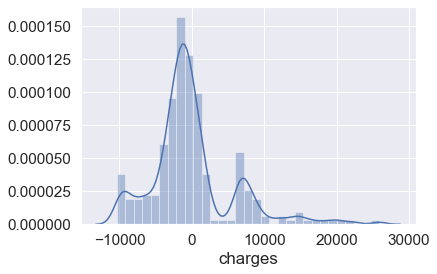

In [41]:
sns.distplot(y_test-y_test_pred)

In [42]:
## Making predictions on train data

y_train_pred = regressor.predict(X_train)

y_train_pred[:15]

array([26292.48474023, 12707.04381506,  7990.22074267,  9391.74271267,
       11167.60671536, 14843.76105471,  7030.46544414, 32083.50548868,
       14305.86120668,  6125.966875  , 27583.87632811, 11973.85376263,
       11950.70340455,  9322.26875504,  1951.58158449])

In [43]:
## Making predictions on train data

## Checking Metrices

from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, mean_absolute_error, mean_squared_error, r2_score

print('MAE: ',mean_absolute_error(y_train, y_train_pred))

print('MSE: ', mean_squared_error(y_train, y_train_pred))

print('RMSE: ',np.sqrt(mean_squared_error(y_train, y_train_pred)))

print('R2: ',r2_score(y_train, y_train_pred)*100)

print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_train_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))


MAE:  4255.911887871833
MSE:  37323556.40222859
RMSE:  6109.300811240889
R2:  75.0010998582634
Adjusted R^2: 0.7485986313429879


# Checking for Auto correlation using Durbin- Watson Test

In [44]:
from statsmodels.stats.stattools import durbin_watson

In [45]:
durbin_watson(y_test-y_test_pred)

1.941735918066688

No auto correlation

# OLS for stats

In [46]:
import statsmodels.api as sm

est = sm.OLS(y_train,X_train)
est2 = est.fit()

print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.872
Model:                            OLS   Adj. R-squared (uncentered):              0.871
Method:                 Least Squares   F-statistic:                              1206.
Date:                Thu, 08 Oct 2020   Prob (F-statistic):                        0.00
Time:                        14:41:06   Log-Likelihood:                         -10897.
No. Observations:                1069   AIC:                                  2.181e+04
Df Residuals:                    1063   BIC:                                  2.184e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Using Ridge

In [47]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [48]:
model = Ridge(alpha= 1, random_state=100, max_iter = 1000, solver ='auto') 

## making alpha 0, we convert it to simple linear regression

In [49]:
#training the algorithm

model.fit(X_train, y_train) 

Ridge(alpha=1, max_iter=1000, random_state=100)

In [50]:
y_rdg_pred = model.predict(X_test)

y_rdg_pred[:5]

array([ 4451.62506117,  4494.25691601,  8396.77701013,  1929.33980357,
       24320.81536564])

In [53]:
#To retrieve the intercept:
print(model.intercept_)
#For retrieving the slope:
print(model.coef_)

-12237.644584717054
[  266.55794178   332.2451377    484.335935    -279.04467534
   -33.66172609 23429.80738268]


There are not very large differences between the values of simple LR and using Ridge though!

In [52]:
## Checking Metrices

from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, mean_absolute_error, mean_squared_error, r2_score

print('MAE: ',mean_absolute_error(y_test, y_rdg_pred))

print('MSE: ', mean_squared_error(y_test, y_rdg_pred))

print('RMSE: ',np.sqrt(mean_squared_error(y_test, y_rdg_pred)))

print('R2: ',r2_score(y_test, y_rdg_pred)*100)

print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_rdg_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))


MAE:  4005.421601142764
MSE:  33660606.954417124
RMSE:  5801.776189617894
R2:  75.16949049719996
Adjusted R^2: 0.7459867418679076


In [54]:
## Making predictions on train data

y_train_pred = model.predict(X_train)

y_train_pred[:15]

array([26181.89936845, 12732.63565389,  8014.40706342,  9416.77653502,
       11191.64399329, 14865.89774516,  7053.39567793, 31981.03248213,
       14335.91992279,  6157.75648786, 27484.28029822, 11999.33683675,
       11974.31517716,  9355.79323187,  1982.51574098])

In [55]:
## Making predictions on train data

## Checking Metrices

from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, mean_absolute_error, mean_squared_error, r2_score

print('MAE: ',mean_absolute_error(y_train, y_train_pred))

print('MSE: ', mean_squared_error(y_train, y_train_pred))

print('RMSE: ',np.sqrt(mean_squared_error(y_train, y_train_pred)))

print('R2: ',r2_score(y_train, y_train_pred)*100)

print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_train_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))


MAE:  4265.50403237081
MSE:  37326482.01867693
RMSE:  6109.540246096832
R2:  74.99914031312636
Adjusted R^2: 0.7485789251828526


Results are almost the same as linear regression

In [ ]:
## Trying for different values of aplha

In [58]:
??Ridge

In [59]:
param_grid = {'alpha': range(1,20),
'max_iter': [500,1000,1500,2000],
             'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

In [62]:
grid = GridSearchCV(Ridge(),
                    param_grid)

In [63]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': range(1, 20),
                         'max_iter': [500, 1000, 1500, 2000],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']})

In [64]:
## Best parameters given by grid search CV

display(grid.best_params_,
       grid.best_score_)

{'alpha': 2, 'max_iter': 500, 'solver': 'sag'}

0.7417088286018195

In [65]:
grid_predictions = grid.predict(X_test)
grid_predictions[:5]

array([ 4491.03240867,  4547.87761476,  8439.09384452,  2027.29773089,
       24292.11824844])

In [66]:
print('MAE: ',mean_absolute_error(y_test, grid_predictions))

print('MSE: ', mean_squared_error(y_test, grid_predictions))

print('RMSE: ',np.sqrt(mean_squared_error(y_test, grid_predictions)))

print('R2: ',r2_score(y_test, grid_predictions)*100)

print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, grid_predictions))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))


MAE:  4005.734102137876
MSE:  33693501.68858373
RMSE:  5804.610382151737
R2:  75.14522495111451
Adjusted R^2: 0.7457385081205968


# Using Lasso

In [69]:
reg_lso = Lasso(alpha=100,random_state=100) 

In [70]:
#training the algorithm

reg_lso.fit(X_train, y_train)

Lasso(alpha=100, random_state=100)

In [72]:
#To retrieve the intercept:
print(reg_lso.intercept_)


#For retrieving the slope:
print(reg_lso.coef_)

-12055.44787087568
[  266.40237257   327.18623432   417.06270761  -192.65563672
     0.         22959.81001809]


It has considerably reduced the slopes

In [74]:
y_lso_pred = reg_lso.predict(X_test)

y_lso_pred[:5]

array([ 4749.04624865,  4657.59850994,  8518.66433327,  2071.63996047,
       23936.51830246])

In [75]:
print('MAE: ',mean_absolute_error(y_test, y_lso_pred))

print('MSE: ', mean_squared_error(y_test, y_lso_pred))

print('RMSE: ',np.sqrt(mean_squared_error(y_test, y_lso_pred)))

print('R2: ',r2_score(y_test, y_lso_pred)*100)

print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_lso_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))


MAE:  4042.3798466849075
MSE:  33990038.72378438
RMSE:  5830.097659883956
R2:  74.92647768727424
Adjusted R^2: 0.7435007487548744


In [76]:
y_trn_pred = reg_lso.predict(X_train)

In [77]:
print('MAE: ',mean_absolute_error(y_train, y_trn_pred))

print('MSE: ', mean_squared_error(y_train, y_trn_pred))

print('RMSE: ',np.sqrt(mean_squared_error(y_train, y_trn_pred)))

print('R2: ',r2_score(y_train, y_trn_pred)*100)

print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_trn_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))


MAE:  4297.605333003776
MSE:  37399693.859539665
RMSE:  6115.52891085797
R2:  74.95010384191775
Adjusted R^2: 0.7480857900486645


### Almost the same results
### Lasso had a greater impact on the slopes though!